100%|██████████| 100/100 [00:00<00:00, 148.31it/s]


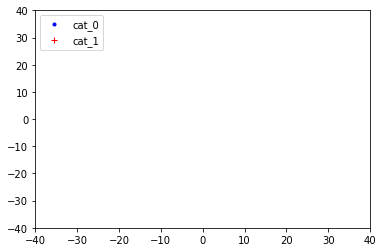

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from tqdm import tqdm, notebook

N = 100
TIMELIMIT = 100
SEED = 65535
random.seed(SEED)

R = 0.1
DX = 0.1
DY = 0.1

class Agent():
    def __init__(self, category):
        self.category = category
        self.x = 0
        self.y = 0
    def calcnext(self):
        if self.category == 0:
            self.category_0()
        elif self.category == 1:
            self.category_1()
        else:
            print('No category')
    def category_0(self):
        for i in range(len(agents)):
            if agents[i].category == 1:
                c0x = self.x
                c0y = self.y
                ax = agents[i].x
                ay = agents[i].y
                if ((c0x-ax)*(c0x-ax) + (c0y-ay)*(c0y-ay)) < R:
                    self.category = 1
            else:
                self.x += random.random() - 0.5
                self.y += random.random() - 0.5
                    
    def category_1(self):
        self.x += DX
        self.y += DY
    def putstate(self):
        print(self.category, self.x, self.y)

def calcNextState(agent_list):
    for i in range(len(agent_list)):
        agent_list[i].calcnext()
        if agent_list[i].category == 0:
            xlist0.append(agent_list[i].x)
            ylist0.append(agent_list[i].y)
        elif agent_list[i].category == 1:
            xlist1.append(agent_list[i].x)
            ylist1.append(agent_list[i].y)
            
agents = [Agent(0) for i in range(N)]

agents[0].category = 1
agents[0].x = -5
agents[0].y = -5

fig = plt.figure()
ax = fig.add_subplot(111)
ims = []
legend_flag = True

for t in tqdm(range(TIMELIMIT)):
    xlist0 = []
    ylist0 = []
    xlist1 = []
    ylist1 = []
    calcNextState(agents)
    plt.axis([-40, 40, -40, 40])
    im_0 = plt.plot(xlist0, ylist0, ".", color='b', label='cat_0')
    im_1 = plt.plot(xlist1, ylist1, "+", color='r', label='cat_1')
    if legend_flag:
        plt.legend()
        legend_flag = False
    ims.append(im_0 + im_1)

ani = animation.ArtistAnimation(fig, ims, interval=100)
ani.save('images/02_interaction.gif', writer='pillow')
HTML(ani.to_jshtml())